In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\Sooraj S Internship doc\Classified Data.unknown",index_col=0)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [19]:
print(confusion_matrix(y_test,pred))

[[140  15]
 [  9 136]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       155
           1       0.90      0.94      0.92       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

NameError: name 'df_feat' is not defined

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [24]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

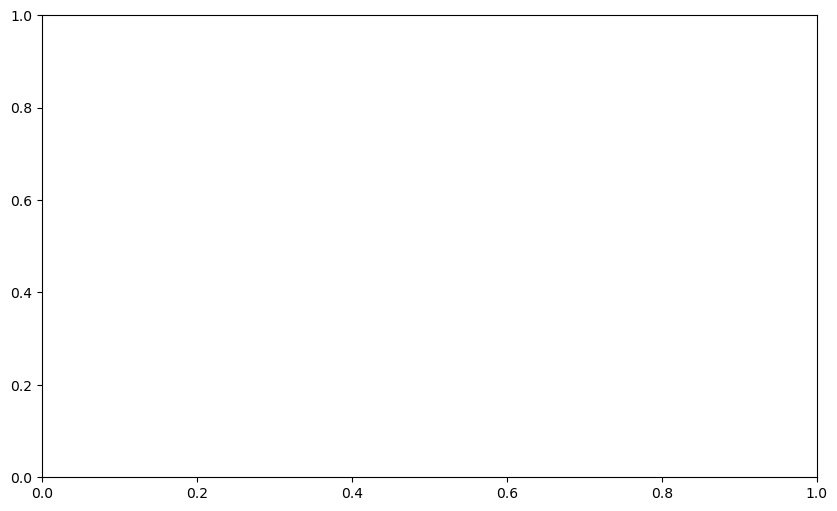

In [25]:

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])          
df_feat.head()